### NLTK Inautural

In [1]:
#lookup error의 경우 download() 전체를 하면 됨.
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\eunsang\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\eunsang\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

In [3]:
# cfd
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could  will would   may might 
      adventure    46   151    50   191     5    58 
 belles_lettres   246   213   236   392   207   113 
      editorial   121    56   233   180    74    39 
        fiction    37   166    52   287     8    44 
     government   117    38   244   120   153    13 
        hobbies   268    58   264    78   131    22 
          humor    16    30    13    56     8     8 
        learned   365   159   340   319   324   128 
           lore   170   141   175   186   165    49 
        mystery    42   141    20   186    13    57 
           news    93    86   389   244    66    38 
       religion    82    59    71    68    78    12 
        reviews    45    40    58    47    45    26 
        romance    74   193    43   244    11    51 
science_fiction    16    49    16    79     4    12 


In [4]:
# modals의 빈도수가 포함된 cfd (word => madal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre)
        if word.lower() == modal
)
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


### Inaugural
- 연설문 코퍼스

In [24]:
inaugural = nltk.corpus.inaugural

In [25]:
inaugural.fileids() # 연도-이름.txt | '2021-Biden.txt'

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [28]:
# ['america', 'citizen'] 빈도수를 cfd로 만드시오. == citizens, citizen's, ...
cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid)
        # if target_word in word.lower()
        if word.lower().startswith(target_word)
)
cfd2.tabulate()

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

In [2]:
import matplotlib.pyplot as plt

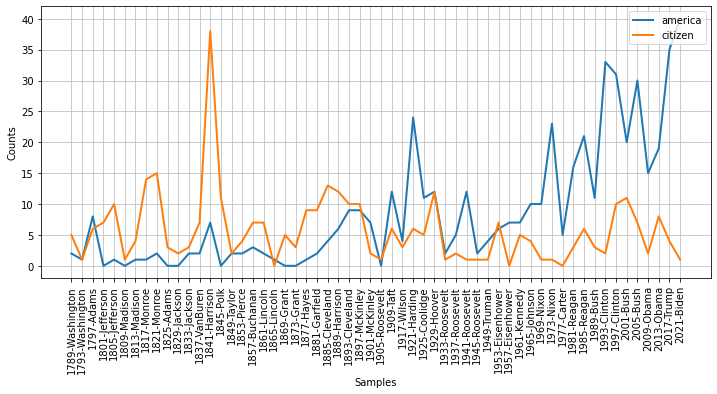

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
#!pip install matplotlib
plt.figure(figsize=(12, 5))
cfd2.plot()

## Ch07 튜플과 리스트
### Tuple vs. List
- 불변 객체 vs. 가변 객체

In [2]:
#1. 생성
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [3]:
#1-1 요소 여러 개일 때
alphabetT = ('a', 'b')
alphabetT = 'a', 'b'
alphabetT

alphabetL = ['a', 'b']

In [4]:
#1-2 요소 1개일 때
alphaT = ('a') # str로 인식! 주의해야함!
type(alphaT)

str

In [5]:
alphaT = ('b',) # 이렇게 해야 튜플로 인식!
type(alphaT)

tuple

- packing: 한 변수에 여러 데이터를 할당하는 것.
    - list, tuple 자체. a = [1, 2, 3, 4]
- unpacking: 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것
    - a='k', b='i', c='m'

In [7]:
a, b, c = 'kim' # unpacking. a=kim, b=kim, c=kim 아님! a=k b=i c=m !
a, b, c

('k', 'i', 'm')

In [8]:
# 값 교환하기 - 튜플이 편함.
pwd = 'avcd'
userId = 'sky'
'''
temp1 = userId
temp2 = pwd
pwd = temp1
userId = temp2
'''
pwd, userId = userId, pwd
pwd, userId

('sky', 'avcd')

In [6]:
# 연산
('a',) + (1, 2), (1, 2) * 3

(('a', 1, 2), (1, 2, 1, 2, 1, 2))

In [10]:
x = ('a',)
y = (1, 2)
id(x), id(x + y) # 튜플은 불변객체. 따라서 x, y가 바뀌는 것이 아닌 새로운 변수에 할당하는 것임. 따라서 id도 다름.

(1667240172800, 1667235711488)

In [11]:
# 비교. 첫 인자부터 비교한다.
x = 1, 2
y = 1, 6

x < y

True

In [12]:
# 순회
for i in x:
    print(x)

(1, 2)
(1, 2)


In [13]:
# 리스트 컴프리헨션에서도 사용 가능. but 리스트로 바뀌는 것임.
[i for i in x] #1

[1, 2]

In [ ]:
# tuple comprehension?? 없음. but 튜플로 변경은 가능.
tuple([i for i in x]) #2
*[i for i in x], # 느림 #3
# 웬만하면 그냥 리스트 컴프리헨션 사용.

In [9]:
# 형변환
dog = 'dog'
dogT = tuple(dog)

In [8]:
(dog,)

('dog',)

In [10]:
list(dog)

['d', 'o', 'g']

In [19]:
# slicing
dogT[0]

'd'

[정리]
- tuple 장점
    - 변하지 않는 데이터 시퀀스를 만들 수 있다. 타인의 접근을 막는다.
        - blue=1, white=2, ...
    - 메모리 사용 적다.
    
- list 장점
    - 튜플 장점 필요 없을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 쓸 수 있다는 점 vs. set

### 리스트의 유용한 함수들
- 변경, 삭제, 추가,
- 리스트컴프리헨션 업그레이드

In [20]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [21]:
# 추가
# append()
num.append(6) # 맨 뒤에 요소 1개만 추가

In [22]:
num

[0, 1, 2, 3, 4, 6]

In [23]:
# 추가
# insert(index, item). index위치에 item추가.
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 6]

In [24]:
# 추가
# 여러 개 추가. extend(list)
x = [6, 6, 6]
num.extend(x) # 리스트를 리스트로 
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [25]:
num += x # 튜플은 안됨. # extend = +
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, 1, 2]

In [26]:
# offset
num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, 1, 2]

In [27]:
# slice
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, 1, 2]

In [15]:
# str 넣으면 unpacking. 그리고 밑의 예 처럼 [3]까지 cat으로 바꾸면 [3]은 없어진다.
num = [2, 2, 2, 2, 3, 4, 6, 6, 6, 6, 1, 2]
num[:4] = 'cat'
num

['c', 'a', 't', 3, 4, 6, 6, 6, 6, 1, 2]

In [29]:
# 삭제
# del list[index]
del num[:3]
num

[2, 3, 4, 6, 6, 6, 6, 1, 2]

In [17]:
# 삭제
# remove(value)
num = [2, 3, 4, [6, 6, 6], 6, 1, 2]
num.remove([6, 6, 6])
num

[2, 3, 4, 6, 1, 2]

In [31]:
# 삭제
# pop(index) 기본값=-1. 따라서 맨뒤 없어짐. 
num.pop()
num

[2, 3, 4, 6, 6, 6, 6, 1]

In [32]:
num.pop(0)
num

[3, 4, 6, 6, 6, 6, 1]

In [34]:
# clear: 다 지움.
num.clear()
num

[]

In [35]:
# 인덱스
num = list(range(5))
num.index(4)

4

In [36]:
0 in num

True

In [38]:
# 정렬: sort(), sorted()
sorted(num, reverse=True) # 변한 값만 복사해서 출력. 안변함.

[4, 3, 2, 1, 0]

In [40]:
num.sort(reverse=True) # 리스트.sort(), 값을 할당하지 않아도 된다. 변함.

In [41]:
num

[4, 3, 2, 1, 0]

In [42]:
# reverse(), reversed()
num.reverse() # 값 반환 o
reversed(num) # 값 반환 x

In [43]:
# 할당
a = list(range(1, 5))
a

[1, 2, 3, 4]

In [44]:
b = a # = -> 메모리주소를 참조하는 것. 따라서 b가 바뀌면 a도 바뀜.
b[0] = 6
a, b

([6, 2, 3, 4], [6, 2, 3, 4])

In [45]:
id(a), id(b) # 메모리주소를 참조했기 때문에 같음.

(1667241214016, 1667241214016)

In [46]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 얕은 복사
c = a.copy()
d = list(a)
e = a[:]

id(a), id(c), id(d), id(e)

(1667241214016, 1667239476864, 1667241216448, 1667240222208)

In [47]:
# deep copy: 깊은 복사, 하위에 중첩된 리스트 요소가 안 바뀌도록
a.append([1, 2, 3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [48]:
f = a.copy()
id(a), id(f) # 

(1667241214016, 1667240429760)

In [49]:
f[-1][0] = 9
a, f

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [50]:
import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [51]:
g[-1][0] = 10
a, g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [55]:
# 순회: zip, enumerate
name = ['kate', 'royce', 'phill']
age = [77, 44, 54, 99]

# (name, age)
for item1, item2 in zip(name, age): # 여러 리스트를 동시에 순회
    print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 54)


In [56]:
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [57]:
# 리스트 + 인덱스 enumerate
for idx, item in enumerate(name):
    print(idx, item)

0 kate
1 royce
2 phill


In [58]:
# 리스트컴프리헨션으로 바꾸기.
[(i, j) for i, j in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [62]:
# name, age를 이용해서 새로운 리스트를 생성하는데 (이름, 나이), for문 사용!
new_list = []
for i, j in zip(name, age):
    new_list.append((i, j))
print(new_list)

[('kate', 77), ('royce', 44), ('phill', 54)]


In [66]:
[(i, j) for i, j in zip(name, age)]

#1. for문의 리.컴으로 바꿔보기
"""
for i in name:
    for j in age:
        print(i, j)
"""        
[(i, j) for j in age for i in name]

[('kate', 77),
 ('royce', 77),
 ('phill', 77),
 ('kate', 44),
 ('royce', 44),
 ('phill', 44),
 ('kate', 54),
 ('royce', 54),
 ('phill', 54),
 ('kate', 99),
 ('royce', 99),
 ('phill', 99)]

In [70]:
#2. [i, j] 리스트의 리스트로 바꿔보기 (리.컴)
"""
for i in name:
    empty = []
    for j in age:
        print(i, j)
        empty.append((i, j))
    output.append(empty)
"""
[[(i, j) for j in age] for i in name]

[[('kate', 77), ('kate', 44), ('kate', 54), ('kate', 99)],
 [('royce', 77), ('royce', 44), ('royce', 54), ('royce', 99)],
 [('phill', 77), ('phill', 44), ('phill', 54), ('phill', 99)]]

In [77]:
sentence = "do not judge a book by its cover"
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

# [(대문자, 첫글자대문자, 글자수), ...]의 리스트 만들기

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [85]:
text = [
    ['Sunja', 'said', 'goodniight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan'],
]
#1. 문장마다 스트링으로 변환해서 리스트로 변환
    # ['문장1', '문장2']
[' '.join(sent) for sent in text]
#2. 전체를 스트링으로 변환
    # '문장1 문장2'
' '.join([' '.join(sent) for sent in text])
#3. 전체 단어 리스트 가져오기
    #
([word for sent in text for word in sent])

['Sunja',
 'said',
 'goodniight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

In [86]:
# if문 - else
[i for i in range(10)] # 짝수면 가져오고, 홀수면 '홀수'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [87]:
[i if i%2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']